In [1]:
from keras.models import Model, Sequential, model_from_json,load_model
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.preprocessing.image import load_img, save_img, img_to_array,ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy.misc import imresize
import os
import PIL
from skimage.transform import resize
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

Using TensorFlow backend.


In [2]:
def instantiate_model(i):
    """Instantiates the VGG Facial recognition model. 
    Removes the last layer from pre-trained model
    Adds a new Dense(120) layer
    Adds a final Dense(2) layer.
    Sets the last i layers as trainable, and fixes the others. """
    
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    model.load_weights('vgg_face_weights.h5')
    
    hidden = Dense(120, activation='relu')(model.layers[-2].output)
    out = Dense(2, activation='softmax')(hidden)
    model2 = Model(input=model.layers[0].input, output=out)
    model = model2
    layer_count = 0
    for layer in model.layers:
        layer_count = layer_count+1
    print(layer_count)
    for l in range(layer_count):
        model.layers[l].trainable=True
    for l in range(layer_count-i):
        model.layers[l].trainable=False

    return model

In [3]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [4]:
def verifyFace(img1, img2):
    """Compares 2 faces: img1 and img2"""
    img1_representation = vgg_face_descriptor.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Cosine similarity: ",cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

In [5]:
def create_collage2(badAJ, badPJ,widthin=600,heightin=300,cols=5,rows=5):    
    for zz in [0,1]:
        if zz == 0:
            bads = badPJ
        else:
            bads = badAJ
        lenP = len(bads)
        if lenP < 1:
            continue
        cols = min(5,lenP)               #round(lenP/2)
        rows = max(1,lenP//cols)  #round(lenP/cols)
        width = int(widthin / 5*cols)
        height = int(rows*(width/cols))
        #print(cols,rows,width,height)        
        thumbnail_width = width//cols
        thumbnail_height = height//rows
        size = thumbnail_width, thumbnail_height
        new_im = Image.new('RGB', (width, height))
        ims = []  
        for p in bads:
            im = Image.fromarray(np.uint8(p))
            im.thumbnail(size)
            ims.append(im)
        i,x,y = 0,0,0
        for col in range(cols):
            for row in range(rows):
                #print(i, x, y)
                tmp = ims[i]
                new_im.paste(tmp, (x, y))
                i += 1
                y += thumbnail_height
            x += thumbnail_width
            y = 0

        if zz == 0:
            print('Thinks Paul is Anthony ====== ')
        else:
            print('Thinks Anthony is Paul ====== ')
        plot_image(new_im)

In [6]:
def create_collage(width, height, path,name,collage_file,cols=4,rows=3):
    print('Collage for ',name,' from ',path)
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    listofimages = os.listdir(path+ name)    
    for p in listofimages:
        #print(path + name + '/' + p)
        if p == '.DS_Store':
            continue
        im = Image.open(path + name + '/' + p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            #print(i, x, y)
            tmp = ims[i]
            new_im.paste(tmp, (x, y))
            i += 1
            y += thumbnail_height
        x += thumbnail_width
        y = 0

    new_im.save(collage_file)
    plot_image(new_im)

In [48]:
def plot_image(image):
    """Displays image"""
    image = np.clip(image, 0.0, 255.0)
    image = image.astype(np.uint8)
    display(PIL.Image.fromarray(image))
    
def resize_im(im,sq):
    """Resize image to 224x224"""
    width,height,col = im.shape
    assert width == height    
    if width != sq:
        im_out = imresize(im, (sq,sq,col), interp='bilinear', mode=None)
        #im_out = resize(im, (sq,sq,col))
    else:
        im_out = im
    return im_out

def getXY(path,sq=224):
    """Gets the images from path, for AJ and PJ.
    Returns X and Y to be fit to model.
    X is ndarray = (# images) x 224 x 224 x 3
    Y is ndarray = (# images) x 2 """
    
    path_to_dataPJ = path + 'PJ/'
    path_to_dataAJ = path + 'AJ/'
    PJfiles = os.listdir(path_to_dataPJ)
    AJfiles = os.listdir(path_to_dataAJ)
    trainy = []
    num_images = 0
    for i in range(len(PJfiles)):
        if PJfiles[i] == '.DS_Store':
            continue
        num_images += 1
    for i in range(len(AJfiles)):
        if AJfiles[i] == '.DS_Store':
            continue
        num_images += 1
    print(path,' Number of images: ',num_images)
    trainX = np.ndarray([num_images,sq,sq,3])
    counter=0
    for i in range(len(PJfiles)):        
        tmp_file = path_to_dataPJ + PJfiles[i]
        if PJfiles[i] == '.DS_Store':
            continue
        tmp = imread(tmp_file)      
        tmp2 = resize_im(tmp,sq)
        trainX[counter,:,:,:] = tmp2[:,:,:3]
        counter += 1
        trainy.append(1)

    for i in range(len(AJfiles)):        
        tmp_file = path_to_dataAJ + AJfiles[i]
        if AJfiles[i] == '.DS_Store':
            continue
        tmp = imread(tmp_file)
        tmp2 = resize_im(tmp,sq)
        trainX[counter,:,:,:] = tmp2[:,:,:3]
        counter += 1
        trainy.append(0)
        
    Y = to_categorical(trainy)
    X = trainX.reshape(num_images,sq,sq,3)
    print('Done importing images from ... ',path)
    return X, Y
def show_errors(predY, trueY,X):
    cm = confusion_matrix(trueY,predY)
    print(cm)
    c = 0
    names = ['Anthony','Paul']
    badimsAJ = []
    badimsPJ = []
    for i,j in list(zip(predY,trueY)):
        k = i-j
        if k != 0:
            #print('Mistake! Thinks ',names[trueY[c]],' is ',names[predY[c]])
            if j == 1: # is actually Paul
                badimsPJ.append(X[c])
            else:
                badimsAJ.append(X[c])
            #plot_image(X[c])
        c += 1  
    create_collage2(badimsAJ,badimsPJ)
    
def plot_history(history):
    """Plot history of training of input model history"""
    plt.plot(history.history['acc'])
    #plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [8]:
path_training = 'Training/'
path_testing = 'Testing/'
trainX, trainY = getXY(path_training)
testX, testY = getXY(path_testing)    

Training/  Number of images:  172


/Users/Anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


Done importing images from ...  Training/
Testing/  Number of images:  24
Done importing images from ...  Testing/


Collage for  AJ  from  Training/


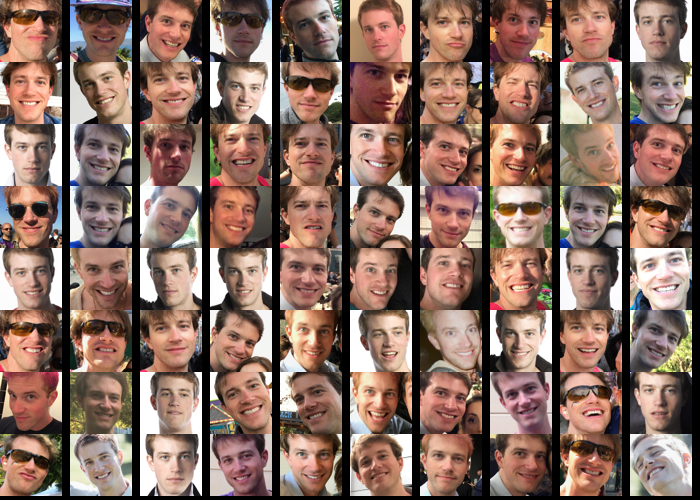

Collage for  PJ  from  Training/


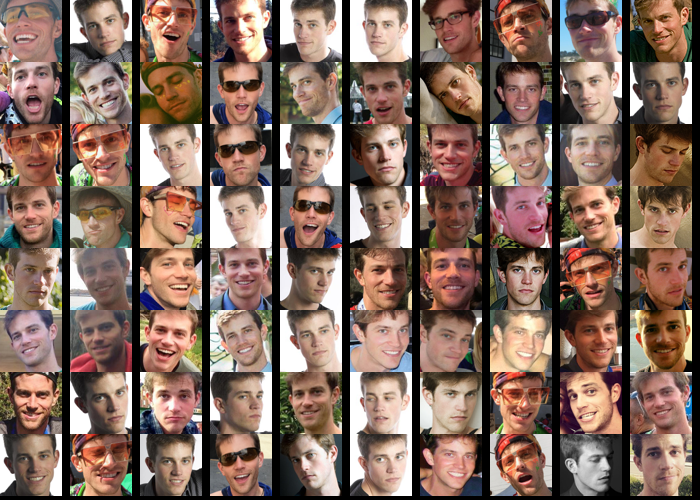

Collage for  AJ  from  Testing/


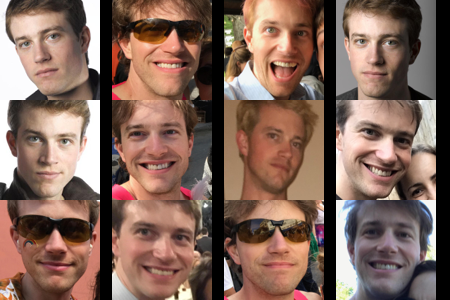

Collage for  PJ  from  Testing/


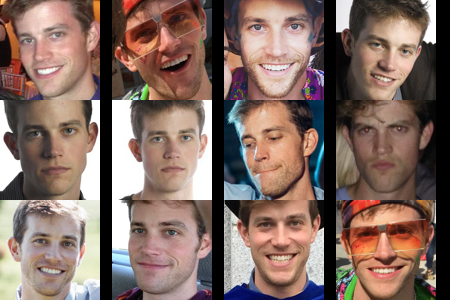

In [9]:
create_collage(700, 500, path_training , 'AJ', 'collage.jpg',10,8)
create_collage(700, 500, path_training , 'PJ', 'collage.jpg',10,8)
create_collage(450, 300, path_testing, 'AJ', 'collage.jpg')
create_collage(450, 300, path_testing , 'PJ', 'collage.jpg')

In [10]:
bestfile = 'BestModels/'
bestfile = ''
file_save = bestfile+'twinmodel5.h5'
if os.path.isfile(file_save) == False:    
    model = instantiate_model(5)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(trainX, trainY, batch_size=32, epochs=50)
    model.save(file_save)
else:
    model = load_model(file_save)
pckl_save = bestfile+'twinmodel_pred5.pckl'
if os.path.isfile(pckl_save) == False: 
    test_predY = model.predict(testX[:])[:,1]
    train_predY = model.predict(trainX[:])[:,1]
    tmp = open(pckl_save, 'wb')
    pickle.dump([test_predY,train_predY], tmp)
    tmp.close()
else:
    tmp = open(pckl_save, 'rb')
    [test_predY,train_predY] = pickle.load(tmp)
    tmp.close()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [11]:
test_predY2 = test_predY.astype(int)
testY2 = testY[:,1].astype(int)
train_predY2 = train_predY.astype(int)
trainY2 = trainY[:,1].astype(int)

[[82  4]
 [ 2 84]]
Thinks Paul is Anthony ====== 


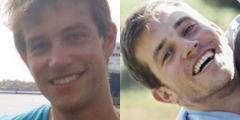

Thinks Anthony is Paul ====== 


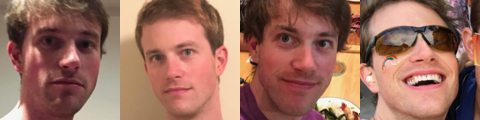

In [12]:
# Train data
show_errors(train_predY2,trainY2,trainX)

[[10  2]
 [ 0 12]]
Thinks Anthony is Paul ====== 


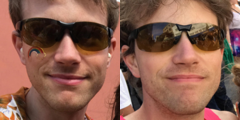

In [13]:
# Test data
show_errors(test_predY2,testY2,testX)

In [14]:
score_train = accuracy_score(trainY2,train_predY2)
score_test = accuracy_score(testY2,test_predY2)
print('Training score: ',score_train, ' , Testing score:',score_test)

Training score:  0.9651162790697675  , Testing score: 0.9166666666666666


twinmodel4.h5


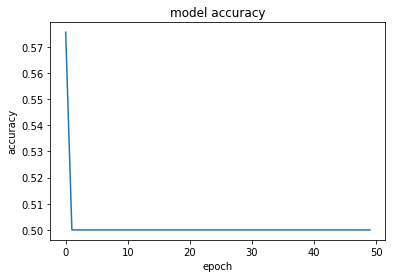

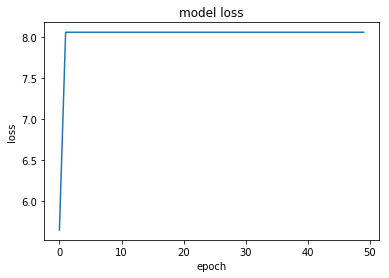

Training score:  0.5  , Testing score: 0.5
[[86  0]
 [86  0]]
Thinks Paul is Anthony ====== 


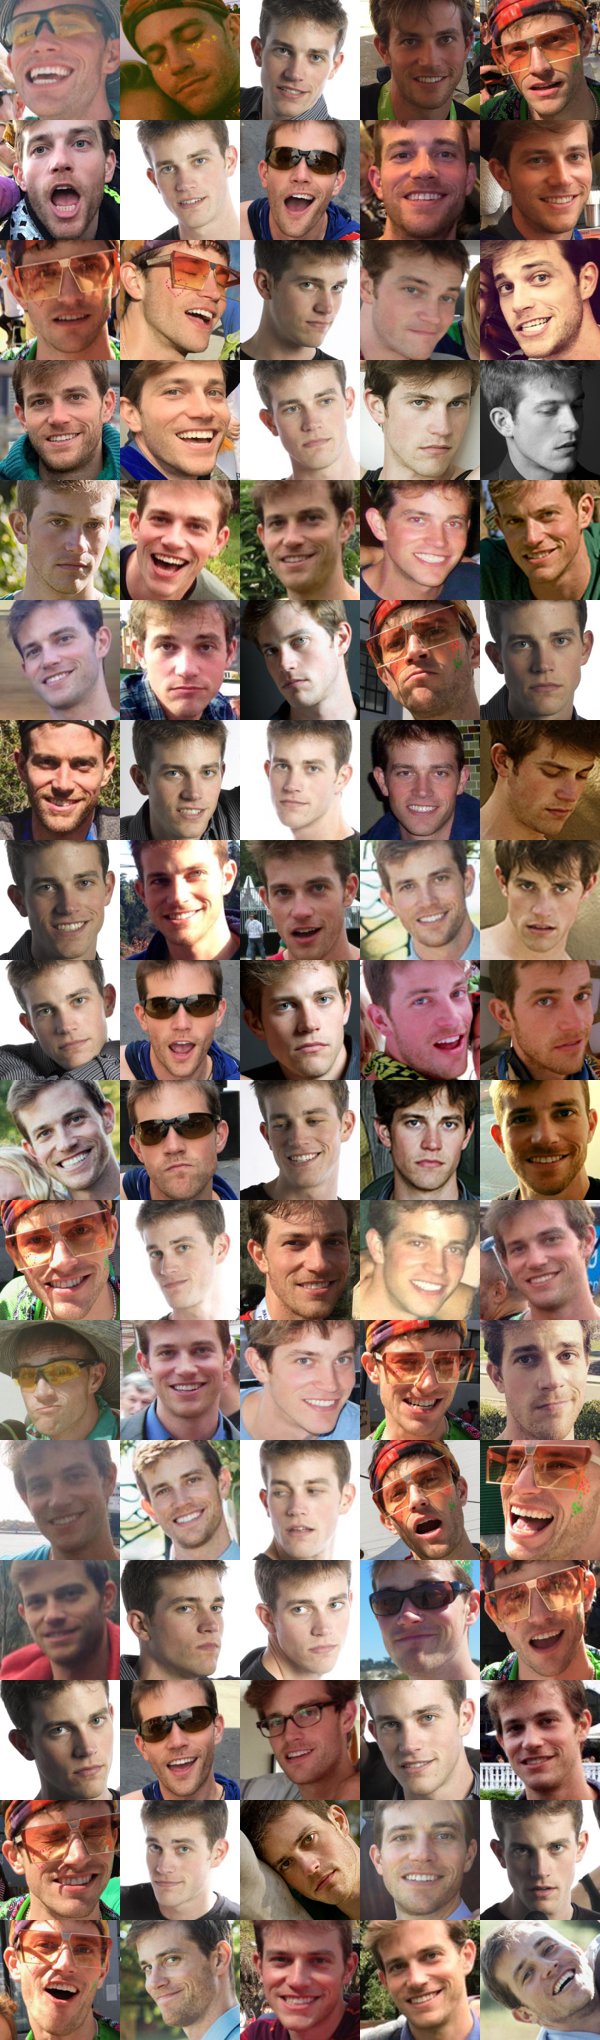

twinmodel5.h5


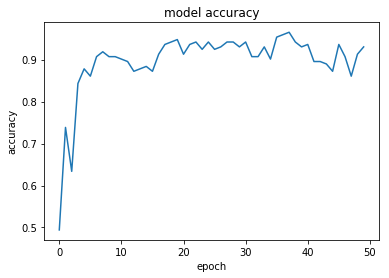

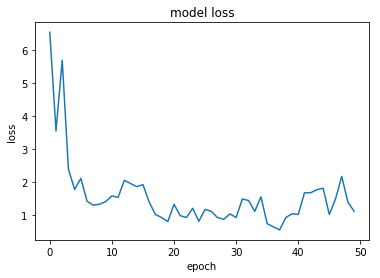

Training score:  0.9651162790697675  , Testing score: 0.9166666666666666
[[82  4]
 [ 2 84]]
Thinks Paul is Anthony ====== 


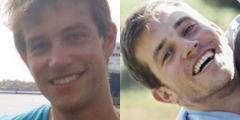

Thinks Anthony is Paul ====== 


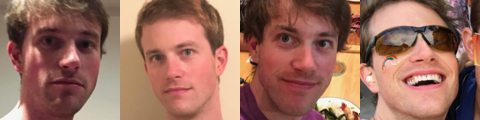

In [47]:
# Try setting more or less layers to untrainable.
for i in [4,5]: #,6,7,8,9]:
    file_save = 'twinmodel' + str(i) + '.h5'
    pckl_save_hist = 'twinmodel'+str(i)+'hist.h5'
    pckl_save = 'twinmodel_pred' + str(i) + '.pckl'
    print(file_save)
    if os.path.isfile(file_save) == False:
        model = instantiate_model(i)
        model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
        history = model.fit(trainX, trainY, batch_size=50, epochs=50)   
        #history = model.fit(trainX, trainY, epochs=50)   
        model.save(file_save)        
        tmp = open(pckl_save_hist, 'wb')
        pickle.dump([history], tmp)
        tmp.close()
    else:
        model = load_model(file_save)
        #try:
        tmp = open(pckl_save_hist, 'rb')
        history = pickle.load(tmp)
        tmp.close()   
        #except:
        #    pass
    
    if os.path.isfile(pckl_save) == False: 
        test_predY = model.predict(testX[:])[:,1]
        train_predY = model.predict(trainX[:])[:,1]
        tmp = open(pckl_save, 'wb')
        pickle.dump([test_predY,train_predY], tmp)
        tmp.close()
    else:
        tmp = open(pckl_save, 'rb')
        [test_predY,train_predY] = pickle.load(tmp)
        tmp.close()  
        
    plot_history(history[0])
    test_predY2 = test_predY.astype(int)
    testY2 = testY[:,1].astype(int)
    train_predY2 = train_predY.astype(int)
    trainY2 = trainY[:,1].astype(int)
    score_train = accuracy_score(trainY2,train_predY2)
    score_test = accuracy_score(testY2,test_predY2)
    print('Training score: ',score_train, ' , Testing score:',score_test)
    show_errors(train_predY2,trainY2,trainX)

In [17]:
# Load best model so far
bestfile = 'BestModels/'
#bestfile = ''
file_save = bestfile+'twinmodel4.h5'
model = load_model(file_save)
pckl_save = bestfile+'twinmodel_pred4.pckl'
tmp = open(pckl_save, 'rb')
[test_predY,train_predY] = pickle.load(tmp)
tmp.close()  

Training score:  0.9767441860465116  , Testing score: 0.9583333333333334
[[86  0]
 [ 4 82]]
Thinks Paul is Anthony ====== 


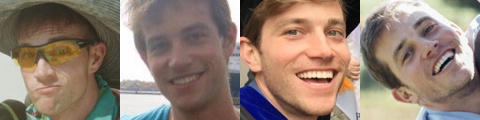

In [18]:
test_predY2 = test_predY.astype(int)
testY2 = testY[:,1].astype(int)
train_predY2 = train_predY.astype(int)
trainY2 = trainY[:,1].astype(int)
score_train = accuracy_score(trainY2,train_predY2)
score_test = accuracy_score(testY2,test_predY2)
print('Training score: ',score_train, ' , Testing score:',score_test)
show_errors(train_predY2,trainY2,trainX)

[[11  1]
 [ 0 12]]
Thinks Anthony is Paul ====== 


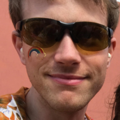

In [19]:
show_errors(test_predY2,testY2,testX)

In [205]:
# Play around with lime package
from lime import lime_image
import lime
from skimage.segmentation import mark_boundaries

In [257]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(trainX[3], model.predict, top_labels=2, hide_color=0, num_samples=100)


/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


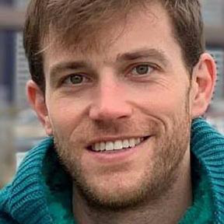

1.0


In [258]:
plot_image(trainX[3])
print(train_predY[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


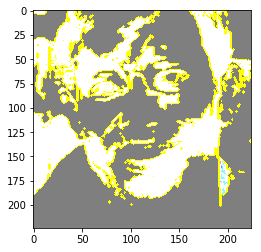

In [259]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=2000, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

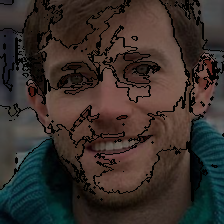

In [260]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=200, hide_rest=False)
plot_image(mark_boundaries(temp / 2 + 0.5, mask))

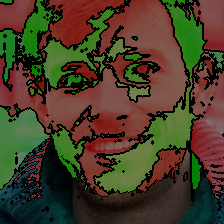

In [261]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=1000, hide_rest=False)
plot_image(mark_boundaries(temp / 2 + 0.5, mask))

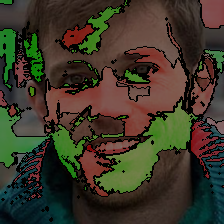

In [262]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.05)
plot_image(mark_boundaries(temp / 2 + 0.5, mask))

In [91]:
# plot of training history 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
#model = Sequential()
#model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
history = model
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ValueError: If fitting from data tensors, you should specify the `steps_per_epoch` argument.

In [ ]:
# Compare faces
epsilon = 0.40
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
#verifyFace("1.jpg", "2.jpg")